In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
x = df.iloc[:, df.columns != 'target']
y = df['target']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

##Choice the best max_depth

In [6]:
depth_values = []

score_range = range(1, 11)

for depth in score_range:
    model_tree = DecisionTreeClassifier(max_depth = depth)
    score = cross_val_score(model_tree, x_train, y_train, cv = 10)
    depth_values.append(score.mean())   

Text(0, 0.5, 'cross validation score')

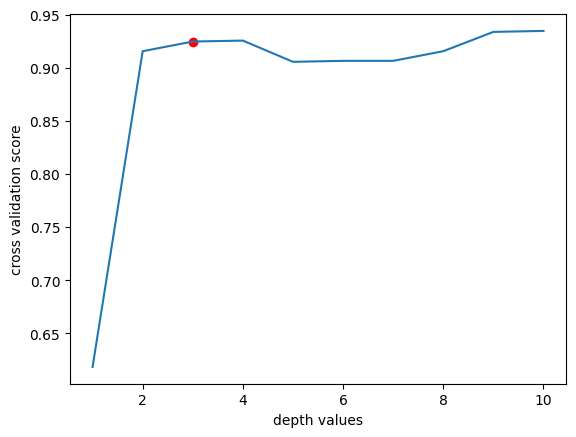

In [7]:
plt.plot(score_range, depth_values)
plt.scatter(score_range[2], depth_values[2], color = 'red')
plt.xlabel('depth values')
plt.ylabel('cross validation score')

In [8]:
model_tree = DecisionTreeClassifier(criterion='gini', random_state = 42, max_depth=3, min_samples_leaf=5)

In [9]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [11]:
y_pred = model_tree.predict(x_test)

In [12]:
result_pred = pd.DataFrame({'actual': y_test, 'predict': y_pred})
result_pred.head()

,actual,predict
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


In [13]:
measure_result = pd.DataFrame({
    'score' : [metrics.r2_score(y_test, y_pred)],
    'rmse' : [np.sqrt(metrics.mean_squared_error(y_test, y_pred))],
    'mae' : [metrics.mean_absolute_error(y_test, y_pred)],
    'accurancy' : [metrics.accuracy_score(y_test, y_pred)]
})
measure_result

,score,rmse,mae,accurancy
0,1.0,0.0,0.0,1.0
